In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

In [2]:
def remove_numbers(x):
    x = str(x)
    return ''.join([i for i in x if not i.isdigit()])

In [3]:
z1 = re.compile('(?<=\-\s)(([A-Z]|[,])+)')
def get_position(x):
    try:
        get = z1.findall(x)[0][0]
        get = get.split(',')
    except:
        get = []
    return get

In [4]:
z2 = re.compile('^\w+\s\w+')
def get_name(x):
    try:
        get = z2.findall(x)[0]
    except:
        get = ''
    return get

In [5]:
z3 = re.compile('(?<=\()[\w]+')
def get_team(x):
    try:
        get = z3.findall(x)[0]
    except:
        get = ''
    return get

In [6]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [7]:
def custom_count(l, entry):
    counter = 0
    for i in l:
        if entry in i:
            counter+=1
    return counter

In [8]:
requirements = {'C':2,
                'LW':2,
                'RW':2,
                'D':4,
                'G':2}

In [9]:
df = pd.read_excel(r"C:\Users\olive\Documents\GitHub\Fantasy-Hockey\Raw Data 2019.xlsx", header=None, names=['Player Name'])
df['Player Name'] = df.apply(lambda row: remove_numbers(row['Player Name']), axis=1)
df['Position'] = df.apply(lambda row: get_position(row['Player Name']), axis=1)
df['Team'] = df.apply(lambda row: get_team(row['Player Name']), axis=1)
df['Player Name'] = df.apply(lambda row: get_name(row['Player Name']), axis=1)

NUM_TEAMS = 14
counter = 0
current_round = 1
for index,row in df.iterrows():
    counter += 1
    df.loc[index, 'Round'] = int(current_round)
    if counter%NUM_TEAMS==0:
        current_round += 1
        
df.head()

,Player Name,Position,Team,Round
0,Nikita Kucherov,[RW],TB,1.0
1,Alex Ovechkin,"[LW, F]",WSH,1.0
2,Connor McDavid,"[C, F]",EDM,1.0
3,Nathan MacKinnon,"[C, RW, F]",COL,1.0
4,Sidney Crosby,"[C, F]",PIT,1.0


In [10]:
data = []
for i in np.unique(np.array(df.loc[:, 'Round'])):
    position_count = dict()
    this_round = i
    positions = df.loc[df['Round']==i, 'Position'].tolist()
    for j in requirements.keys():
        position_count[j] = custom_count(positions, j)
    data.append({
        'Round':int(i),
        **position_count
    })
rounds = pd.DataFrame(data)
rounds.set_index('Round', drop=True, inplace=True)

In [11]:
rounds.head()

,C,D,G,LW,RW
Round,,,,,
1,7,1,0,3,4
2,5,1,4,2,4
3,5,1,3,2,3
4,6,4,2,2,1
5,5,3,3,3,1


C [7, 5, 5, 6, 5, 2, 4, 3, 4, 3, 4, 5, 2, 5, 3, 3, 2, 0, 5, 8, 2, 9, 3, 1, 4, 4, 4, 4, 6, 1]
D [1, 1, 1, 4, 3, 4, 2, 5, 4, 3, 6, 4, 4, 3, 3, 1, 5, 1, 7, 1, 4, 2, 3, 6, 4, 7, 3, 4, 1, 0]
G [0, 4, 3, 2, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 2, 1, 2, 2, 1, 0, 1, 4, 2, 1, 1, 1, 1, 3, 0]
LW [3, 2, 2, 2, 3, 3, 4, 4, 4, 1, 2, 1, 3, 3, 8, 6, 6, 7, 1, 5, 3, 1, 2, 4, 2, 1, 5, 3, 2, 0]
RW [4, 4, 3, 1, 1, 5, 6, 4, 2, 3, 1, 2, 3, 4, 2, 5, 3, 5, 0, 2, 6, 1, 3, 1, 3, 2, 3, 2, 3, 0]


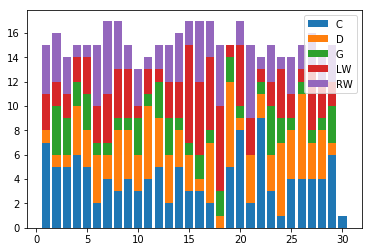

In [16]:
N = len(rounds)
sum_bottom = np.zeros(N)

for i in rounds.columns:
    pos = []
    for index,row in rounds.iterrows():
        pos.append(row[i])
    print(i, pos)
    ind = np.arange(1,N+1)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    plt.bar(ind, pos, bottom=sum_bottom)
    
    for index,row in rounds.iterrows():
        sum_bottom[index-1]=sum_bottom[index-1]+row[i]
        
plt.legend(rounds.columns)

In [13]:
l = []
l.append('C')
l.append('G')
l.append('G')
l.append('D')
l.append('D')
l.append('LW')
l.append('RW')
l.append('D')
l.append('D')
l.append('C')
l.append('RW')
l.append('LW')

In [14]:
l

['C', 'G', 'G', 'D', 'D', 'RW', 'RW', 'D', 'D', 'C', 'LW', 'LW']